## Importing necessary libraries

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

## Load the dataset

In [232]:
rental_data = pd.read_excel('HalifaxRentalsSt.xlsx')

In [233]:
# View the first few rows of the DataFrame
print(rental_data.head())

     Sl        Sitename                                       Listing Name  \
0  1001  apartments.com                                 1-3 Farthington Pl   
1  1002       Kijiji.ca  2 McIntosh St - 2 Bedroom Apartment - Spryfiel...   
2  1003  apartments.com                                        Paige Plaza   
3  1004       Kijiji.ca  June 1 -  4 Bedroom House -  10 Minutes to Dow...   
4  1005       Kijiji.ca               4 Bedroom House in Halifax for March   

   ApartmentSize  MonthlyRent Location  Bedroom  Bathroom  Street Number  \
0            739         1785  Halifax        1       1.0            1.0   
1            500         2050  Halifax        2       1.0            2.0   
2            861         2095  Halifax        2       1.0            9.0   
3           2700         3600  Halifax        4       2.0           11.0   
4           4400         3995  Halifax        3       3.0           12.0   

             Street Name     Province Country  
0  Farthington Pl Street  

In [234]:
# Get summary statistics of numeric columns
print(rental_data.describe())

                Sl  ApartmentSize  MonthlyRent     Bedroom    Bathroom  \
count   404.000000     404.000000   404.000000  404.000000  404.000000   
mean   1262.945545     926.306931  2221.626238    1.611386    1.292079   
std     153.295793     528.372692   749.170397    0.910359    0.543481   
min    1001.000000     100.000000   130.000000    0.000000    1.000000   
25%    1141.750000     600.000000  1800.000000    1.000000    1.000000   
50%    1244.500000     800.000000  2100.000000    2.000000    1.000000   
75%    1397.250000    1092.500000  2600.000000    2.000000    1.500000   
max    1583.000000    4400.000000  6600.000000    5.000000    4.000000   

       Street Number  
count     228.000000  
mean     2883.973684  
std      2395.298857  
min         1.000000  
25%      1030.000000  
50%      2030.500000  
75%      5633.000000  
max      7037.000000  


In [235]:
# Display the DataFrame
rental_data

,Sl,Sitename,Listing Name,ApartmentSize,MonthlyRent,Location,Bedroom,Bathroom,Street Number,Street Name,Province,Country
0,1001,apartments.com,1-3 Farthington Pl,739,1785,Halifax,1,1.0,1.0,Farthington Pl Street,Nova Scotia,Canada
1,1002,Kijiji.ca,2 McIntosh St - 2 Bedroom Apartment - Spryfiel...,500,2050,Halifax,2,1.0,2.0,McIntosh St Htreet,Nova Scotia,Canada
2,1003,apartments.com,Paige Plaza,861,2095,Halifax,2,1.0,9.0,Paige Plaza Street,Nova Scotia,Canada
3,1004,Kijiji.ca,June 1 - 4 Bedroom House - 10 Minutes to Dow...,2700,3600,Halifax,4,2.0,11.0,Rocklyn Road Htreet,Nova Scotia,Canada
4,1005,Kijiji.ca,4 Bedroom House in Halifax for March,4400,3995,Halifax,3,3.0,12.0,Palmer Hill Htreet,Nova Scotia,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...
399,1579,Kijiji.ca,1 bedroom townhouse springhill nova scotia,700,1300,Sackville,1,1.0,NaN,Upper Sackville Street,Nova Scotia,Canada
400,1580,Kijiji.ca,1 bedroom apartment in the North End - May 1,400,1450,Halifax,1,1.0,NaN,Veith Street htreet,Nova Scotia,Canada
401,1581,Kijiji.ca,"South-end, Victorian 2 bedroom",950,2400,Halifax,2,1.0,NaN,Victoria Rd ttreet,Nova Scotia,Canada
402,1582,Kijiji.ca,1173 WELLINGTON ST. - ONE BEDROOM APARTMENT,700,1850,Halifax,1,1.0,NaN,Wellington Street ntreet,Nova Scotia,Canada


## Data preprocessing

In [236]:
# Data Cleaning - Dropping Missing Values:
rental_data.dropna(inplace=True)
# Explanation: Removes any rows with missing values (NaNs) from the DataFrame and updates the DataFrame in place.

In [237]:
# Display the DataFrame
# Get summary statistics of numeric columns
print(rental_data.describe())
rental_data

                Sl  ApartmentSize  MonthlyRent     Bedroom    Bathroom  \
count   228.000000     228.000000   228.000000  228.000000  228.000000   
mean   1147.578947     862.184211  2245.688596    1.460526    1.212719   
std      77.468981     445.276275   634.109091    0.787134    0.469009   
min    1001.000000     257.000000   450.000000    0.000000    1.000000   
25%    1095.750000     596.500000  1848.750000    1.000000    1.000000   
50%    1154.500000     800.000000  2110.000000    1.000000    1.000000   
75%    1211.250000    1001.250000  2596.000000    2.000000    1.000000   
max    1270.000000    4400.000000  4615.000000    4.000000    3.500000   

       Street Number  
count     228.000000  
mean     2883.973684  
std      2395.298857  
min         1.000000  
25%      1030.000000  
50%      2030.500000  
75%      5633.000000  
max      7037.000000  


,Sl,Sitename,Listing Name,ApartmentSize,MonthlyRent,Location,Bedroom,Bathroom,Street Number,Street Name,Province,Country
0,1001,apartments.com,1-3 Farthington Pl,739,1785,Halifax,1,1.0,1.0,Farthington Pl Street,Nova Scotia,Canada
1,1002,Kijiji.ca,2 McIntosh St - 2 Bedroom Apartment - Spryfiel...,500,2050,Halifax,2,1.0,2.0,McIntosh St Htreet,Nova Scotia,Canada
2,1003,apartments.com,Paige Plaza,861,2095,Halifax,2,1.0,9.0,Paige Plaza Street,Nova Scotia,Canada
3,1004,Kijiji.ca,June 1 - 4 Bedroom House - 10 Minutes to Dow...,2700,3600,Halifax,4,2.0,11.0,Rocklyn Road Htreet,Nova Scotia,Canada
4,1005,Kijiji.ca,4 Bedroom House in Halifax for March,4400,3995,Halifax,3,3.0,12.0,Palmer Hill Htreet,Nova Scotia,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...
223,1266,Kijiji.ca,2 Bedrooms + DEN in Halifax for June,1668,4615,Halifax,2,3.0,7037.0,Mumford Rd Htreet,Nova Scotia,Canada
224,1267,Kijiji.ca,2 Bedroom in Halifax for June,1238,3695,Halifax,2,2.0,7037.0,Mumford Rd Htreet,Nova Scotia,Canada
225,1268,findallrentals.ca,1 bedroom apartment of 365 sq. ft in Halifax,365,3395,Halifax,1,1.0,7037.0,Mumford Rd 0treet,Nova Scotia,Canada
226,1269,findallrentals.ca,1 bedroom apartment of 409 sq. ft in Halifax,409,3695,Halifax,1,1.0,7037.0,Mumford Rd 0treet,Nova Scotia,Canada


##  Exploratory Data Analysis (EDA)

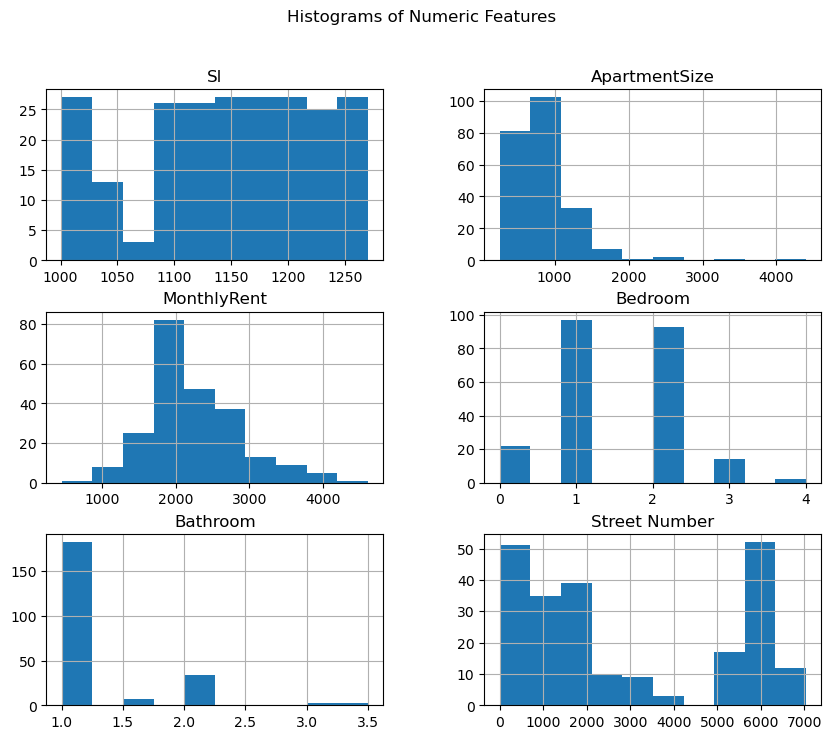

In [238]:
# Histograms of numeric features
rental_data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()

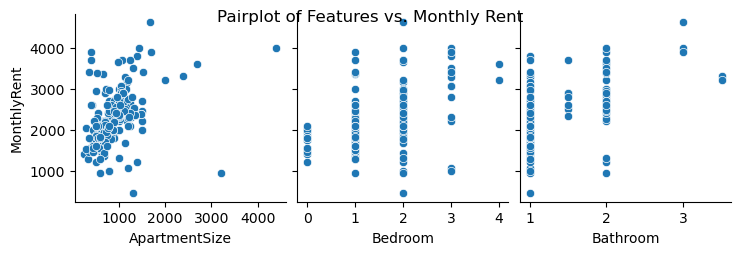

In [239]:
# Pairplot to visualize relationships between features and target variable
sns.pairplot(rental_data, x_vars=['ApartmentSize', 'Bedroom', 'Bathroom'], y_vars='MonthlyRent', kind='scatter')
plt.suptitle('Pairplot of Features vs. Monthly Rent')
plt.show()

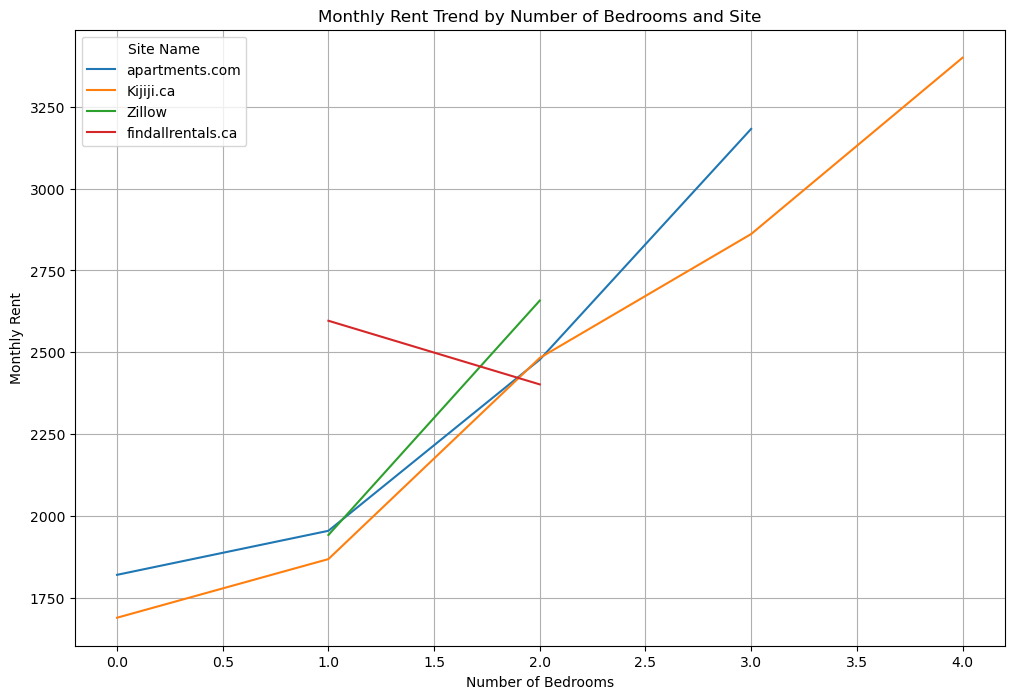

In [240]:
# To visualize the trend of monthly rent by the number of bedrooms across different sites
# Line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=rental_data, x='Bedroom', y='MonthlyRent', hue='Sitename', errorbar=None)
plt.title('Monthly Rent Trend by Number of Bedrooms and Site')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Monthly Rent')
plt.legend(title='Site Name')
plt.grid(True)
plt.show()

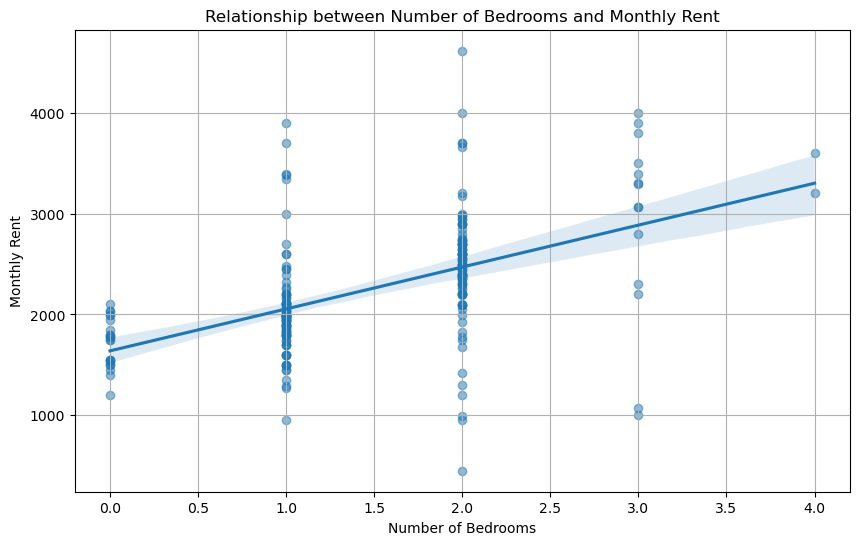

In [242]:
# Scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(data=rental_data, x='Bedroom', y='MonthlyRent', scatter_kws={'alpha':0.5})
plt.title('Relationship between Number of Bedrooms and Monthly Rent')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Monthly Rent')
plt.grid(True)
plt.show()

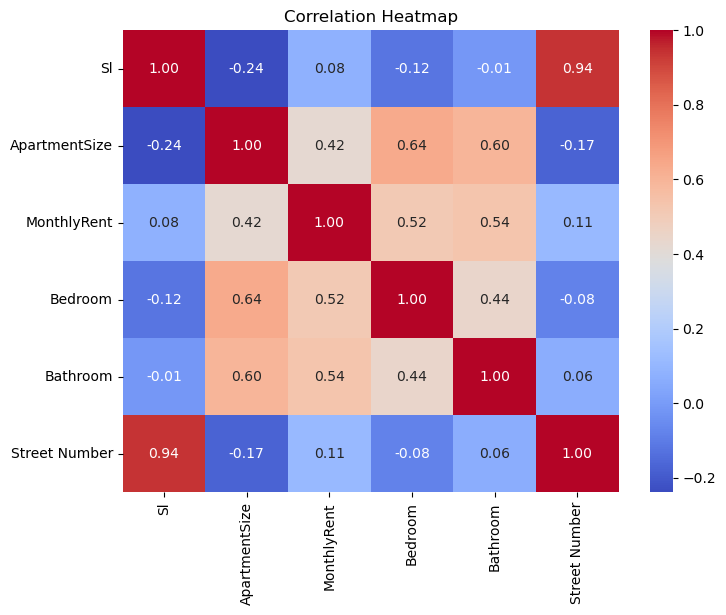

In [243]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rental_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Monthly Rent Prediction

In [244]:
# Grouping the data by 'Street Name' and calculating the mean for numerical columns
grouped_data = rental_data.groupby('Street Name').agg(
    Average_Apartment_Size=('ApartmentSize', 'mean'),
    Average_Monthly_Rent=('MonthlyRent', 'mean'),
    Average_Bedrooms=('Bedroom', 'mean'),
    Average_Bathrooms=('Bathroom', 'mean'),
    Count_Listings=('Street Name', 'size')
).reset_index()

grouped_data.head()

,Street Name,Average_Apartment_Size,Average_Monthly_Rent,Average_Bedrooms,Average_Bathrooms,Count_Listings
0,& Street,957.0,2450.0,2.0,1.0,1
1,Almon Street ntreet,1289.0,2800.0,3.0,1.5,1
2,Argyle Street etreet,500.0,1495.0,1.0,1.0,1
3,Armenia Dr Road,1338.0,2525.0,2.0,1.0,1
4,Barrington St treet,741.0,1875.0,1.0,1.0,1


In [245]:
# Identify streets with at least 5 listings
streets_with_enough_data = grouped_data[grouped_data['Count_Listings'] >= 5]

streets_with_enough_data

,Street Name,Average_Apartment_Size,Average_Monthly_Rent,Average_Bedrooms,Average_Bathrooms,Count_Listings
18,Brunswick Street,723.333333,2229.444444,1.222222,1.000000,9
19,Brunswick Street Htreet,696.125000,2165.625000,1.125000,1.000000,8
41,Fenwick St Htreet,805.000000,2542.142857,1.428571,1.285714,7
69,Mumford Rd Htreet,1278.600000,3339.000000,2.200000,2.000000,5
99,South Park Htreet,769.500000,2439.700000,1.200000,1.150000,10
102,South Park Street,750.000000,2669.166667,1.333333,1.333333,6


In [246]:
# Redefining the linear regression model
model = LinearRegression()

# Training the model with aligned data
model.fit(X_train, y_train)

# Predicting the rent with the trained model
y_pred = model.predict(X_test)

# Calculating the performance metrics: Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2.440287773352546e+32, -5.085555724560784e+26)

In [247]:
# Load the necessary original columns for modeling
original_data_for_modeling = rental_data[['Street Name', 'Bedroom', 'MonthlyRent']]

# One-hot encode the 'Street Name' in the original dataset
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
street_encoded = encoder.fit_transform(original_data_for_modeling[['Street Name']])
street_encoded_df = pd.DataFrame(street_encoded, columns=encoder.get_feature_names_out())

# Combine the encoded street names with the 'Bedroom' feature
model_data_direct = pd.concat([street_encoded_df, original_data_for_modeling[['Bedroom']]], axis=1)

# Target variable from the original data
target_direct = original_data_for_modeling['MonthlyRent']

# Split the dataset into training and testing sets for the direct input model
X_train_direct, X_test_direct, y_train_direct, y_test_direct = train_test_split(model_data_direct, target_direct, test_size=0.2, random_state=0)

# Redefine and train the linear regression model for direct input
model_direct = LinearRegression()
model_direct.fit(X_train_direct, y_train_direct)

# Predict the rent with the trained model
y_pred_direct = model_direct.predict(X_test_direct)

# Calculate the performance metrics: Mean Squared Error (MSE) and R-squared (R2) for the direct model
mse_direct = mean_squared_error(y_test_direct, y_pred_direct)
r2_direct = r2_score(y_test_direct, y_pred_direct)

mse_direct, r2_direct

(3.1978265321760784e+30, -8.084070428513773e+24)

In [248]:
# Prepare your data with necessary preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
street_encoded = encoder.fit_transform(rental_data[['Street Name']])
street_encoded_df = pd.DataFrame(street_encoded, columns=encoder.get_feature_names_out())
model_data = pd.concat([street_encoded_df, rental_data[['Bedroom']]], axis=1)
target = rental_data['MonthlyRent']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_data, target, test_size=0.2, random_state=0)

# Train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict rent based on user input
def predict_rent():
    # Get user input for street name and number of bedrooms
    street_name = input("Enter the street name: ")
    bedrooms = int(input("Enter the number of bedrooms: "))
    
    # Prepare the input data for prediction
    input_data = pd.DataFrame({'Street Name': [street_name], 'Bedroom': [bedrooms]})
    encoded_street = encoder.transform(input_data[['Street Name']])
    input_features = np.concatenate([encoded_street, np.array([[bedrooms]])], axis=1)
    
    # Predict the rent using the trained model
    predicted_rent = model.predict(input_features)
    return predicted_rent[0]

# Call the function to make a prediction
predicted_rent = predict_rent()
print(f"Predicted rent: ${predicted_rent:.2f}")

Enter the street name: Barrington Street
Enter the number of bedrooms: 2
Predicted rent: $2406.81


C:\Users\palla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Data Modelling

In [249]:
# Extract relevant variables
features = rental_data[['ApartmentSize', 'Bedroom', 'Bathroom']]
target = rental_data['MonthlyRent']

In [250]:
# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, target, test_size=0.2, random_state=42)

In [251]:
# Feature scaling for regression
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

## Regression

### Linear Regression

Linear Regression Mean Squared Error: 215501.13537544126
Linear Regression Mean Absolute Error: 309.3173945381047


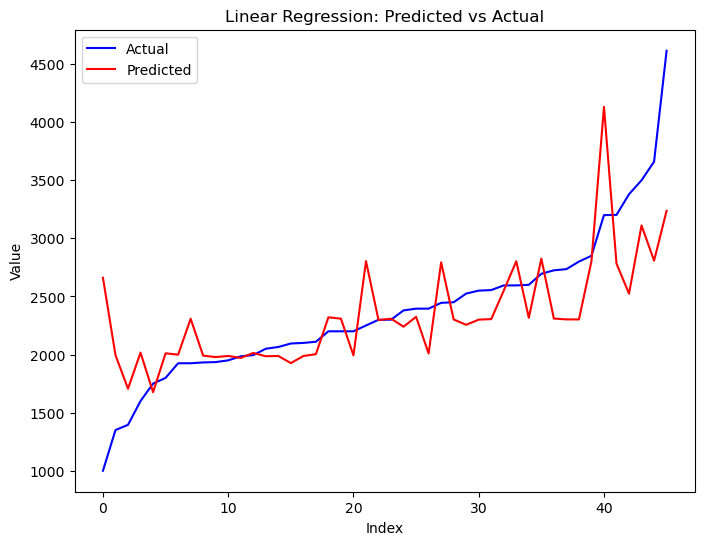

In [252]:
# Modeling - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_linear)
mae_linear = mean_absolute_error(y_test_reg, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)
print("Linear Regression Mean Absolute Error:", mae_linear)

# Sort the test dataset by actual values for better visualization
sorted_indices = y_test_reg.argsort()

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_test_reg)), y_test_reg.iloc[sorted_indices], color='blue', label='Actual')
plt.plot(np.arange(len(y_test_reg)), y_pred_linear[sorted_indices], color='red', label='Predicted')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### Ridge Regression

In [253]:
# Modeling - Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled_reg)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression Mean Absolute Error:", mae_ridge)

Ridge Regression Mean Squared Error: 215259.94572953624
Ridge Regression Mean Absolute Error: 308.9469322297582


### Lasso Regression

In [254]:
# Modeling - Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled_reg)
mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_reg, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression Mean Absolute Error:", mae_lasso)

Lasso Regression Mean Squared Error: 215476.10902985485
Lasso Regression Mean Absolute Error: 309.26674133518543


## Classification

### Splitting the data

In [255]:
# Split the dataset into training and testing sets for classification
y_class = np.where(rental_data['MonthlyRent'] <= rental_data['MonthlyRent'].quantile(0.75), 1, 0)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features, y_class, test_size=0.2, random_state=42)

# Feature scaling for classification
scaler_cls = StandardScaler()
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

### Logistic Regression


Logistic Regression Accuracy (Classification): 0.8043478260869565
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.86      0.88      0.87        34

    accuracy                           0.80        46
   macro avg       0.75      0.73      0.74        46
weighted avg       0.80      0.80      0.80        46

Confusion Matrix:
[[ 7  5]
 [ 4 30]]


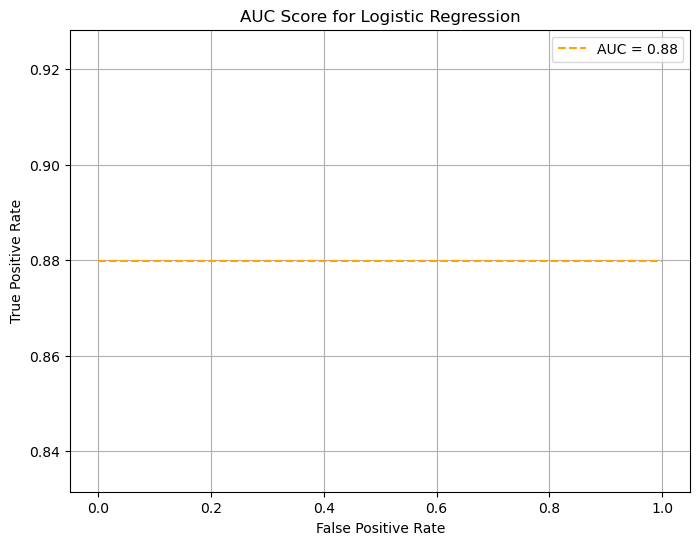

AUC Score: 0.8799019607843137


In [256]:
# Modeling - Logistic Regression for Classification
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Logistic Regression for Classification
y_pred_logistic_cls = logistic_model.predict(X_test_scaled_cls)
accuracy_logistic_cls = accuracy_score(y_test_cls, y_pred_logistic_cls)
print("\nLogistic Regression Accuracy (Classification):", accuracy_logistic_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_logistic_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_logistic_cls))

# Calculate the predicted probabilities for positive class
y_prob_logistic_cls = logistic_model.predict_proba(X_test_scaled_cls)[:, 1]

# Calculate the AUC score
auc_logistic = roc_auc_score(y_test_cls, y_prob_logistic_cls)

# Plotting the AUC score as a horizontal line
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [auc_logistic, auc_logistic], linestyle='--', color='orange', label=f'AUC = {auc_logistic:.2f}')
plt.title('AUC Score for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", auc_logistic)

### Decision Tree

In [257]:
# Modeling - Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Decision Tree Classifier
y_pred_dt_cls = dt_model.predict(X_test_scaled_cls)
accuracy_dt_cls = accuracy_score(y_test_cls, y_pred_dt_cls)
print("\nDecision Tree Classifier Accuracy:", accuracy_dt_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_dt_cls))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_dt_cls))


Decision Tree Classifier Accuracy: 0.8043478260869565
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.93      0.79      0.86        34

    accuracy                           0.80        46
   macro avg       0.76      0.81      0.77        46
weighted avg       0.84      0.80      0.81        46

Confusion Matrix:
[[10  2]
 [ 7 27]]


### Random Forest

In [258]:
# Modeling - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Random Forest Classifier
y_pred_rf_cls = rf_model.predict(X_test_scaled_cls)
accuracy_rf_cls = accuracy_score(y_test_cls, y_pred_rf_cls)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_rf_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_rf_cls))


Random Forest Classifier Accuracy: 0.7608695652173914
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        12
           1       0.90      0.76      0.83        34

    accuracy                           0.76        46
   macro avg       0.71      0.76      0.72        46
weighted avg       0.80      0.76      0.77        46

Confusion Matrix:
[[ 9  3]
 [ 8 26]]


### Support Vector Classifier

In [259]:
# Modeling - Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Support Vector Classifier (SVC)
y_pred_svc_cls = svc_model.predict(X_test_scaled_cls)
accuracy_svc_cls = accuracy_score(y_test_cls, y_pred_svc_cls)
print("\nSupport Vector Classifier (SVC) Accuracy:", accuracy_svc_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_svc_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_svc_cls))


Support Vector Classifier (SVC) Accuracy: 0.8478260869565217
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.89      0.91      0.90        34

    accuracy                           0.85        46
   macro avg       0.81      0.79      0.80        46
weighted avg       0.84      0.85      0.85        46

Confusion Matrix:
[[ 8  4]
 [ 3 31]]
